# Questions:
What songs are most popular?
    
    - Top 5 most popular songs for every decade. 


    - Which sub-genres are most popular on average?
        - Characteristics of popular songs

        
    - Regression analysis on song popularity vs characteristics

## Quick Data Cleansing

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import copy



# load dataset

df = pd.read_csv('/Users/bryceloomis/Downloads/archive/spotify_songs.csv')

In [96]:
# display the first few rows of the df 
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [97]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [98]:

# get a concise summary of the df

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [99]:
# statistical summary of the df

print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

In [100]:
# experimenting to see what happens if you don't standardise to year only vs data patterns that might come from standardizing

# Convert 'track_album_release_date' to datetime, coercing errors to NaT
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract just the year from these dates
df['year_only'] = df['track_album_release_date'].dt.year

# Create decade column from dates
df['decade'] = (df['track_album_release_date'].dt.year // 10) * 10

# For entries that are NaT in 'track_album_release_date', fill with the first day of the year from 'year_only'
df['track_album_release_date'] = df['track_album_release_date'].fillna(pd.to_datetime(df['year_only'], format='%Y'))

# Optionally, if you want to ensure all dates are at the start of the year for year-only entries
df['track_album_release_date'] = df['track_album_release_date'].apply(lambda x: x.replace(month=1, day=1) if pd.isnull(x.month) or pd.isnull(x.day) else x)



In [101]:
# check for missing values

print(df.isnull().sum())

track_id                       0
track_name                     5
track_artist                   5
track_popularity               0
track_album_id                 0
track_album_name               5
track_album_release_date    1886
playlist_name                  0
playlist_id                    0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
year_only                   1886
decade                      1886
dtype: int64


In [102]:
# remove rows with missing values 

df.dropna(inplace=True)

## Musical Feature Summary Stat



In [103]:
df_notable = df[['track_popularity', 'danceability', 'energy', 'key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].describe()
summary = df_notable.drop('count')
summary


,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
mean,42.756092,0.65726,0.698857,5.368011,-6.639354,0.108230,0.175963,0.086956,0.189978,0.505024,120.942303,223946.640973
std,24.951656,0.14393,0.180722,3.613992,2.949117,0.101773,0.220050,0.227409,0.153933,0.232749,26.849662,59116.339335
min,0.000000,0.00000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,25.000000,0.56600,0.582000,2.000000,-8.073000,0.041500,0.015200,0.000000,0.093100,0.326000,99.975000,186750.000000
50%,45.000000,0.67400,0.721000,6.000000,-6.093000,0.063600,0.081000,0.000015,0.127000,0.506000,122.001000,214400.000000
75%,62.000000,0.76200,0.840000,9.000000,-4.605000,0.134000,0.256000,0.005060,0.247000,0.687000,133.519000,251099.750000
max,100.000000,0.98300,1.000000,11.000000,1.275000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### dataset durations group by playlist genre and playlist subgenre

In [104]:
df_play_stats = df.groupby(['playlist_genre', 'playlist_subgenre'])['duration_ms'].describe().round(2)
df_play_stats.drop(['25%', '50%', '75%'], axis=1) # removed these labels i have no use for

count       mean       std  \
playlist_genre playlist_subgenre                                        
edm            big room                   1200.0  203609.61  48738.44   
               electro house              1502.0  216370.64  66817.64   
               pop edm                    1507.0  205604.11  40165.90   
               progressive electro house  1760.0  252188.02  87142.05   
latin          latin hip hop              1572.0  223728.64  55642.04   
               latin pop                  1190.0  215394.50  39653.49   
               reggaeton                   925.0  218244.04  41534.59   
               tropical                   1274.0  204386.19  46257.24   
pop            dance pop                  1265.0  207056.97  40759.41   
               electropop                 1325.0  234246.15  55309.40   
               indie poptimism            1647.0  216113.25  39317.45   
               post-teen pop              1066.0  207874.93  35626.33   
r&b            hip pop                    1225.0  211027.12  47456.53   
               neo soul                   1547.0  238648.83  58384.27   
               new jack swing              985.0  274623.53  45536.95   
               urban contemporary         1337.0  227718.86  57139.98   
rap            gangster rap               1352.0  214890.21  59496.15   
               hip hop                    1313.0  181064.36  54543.10   
               southern hip hop           1512.0  244891.99  56613.75   
               trap                       1291.0  200910.66  46653.01   
rock           album rock                  910.0  255362.25  76265.88   
               classic rock               1012.0  255682.49  71245.46   
               hard rock                  1282.0  236779.06  54414.20   
               permanent wave              943.0  244914.81  58643.66   

                                               min       max  
playlist_genre playlist_subgenre                              
edm            big room                   115312.0  396353.0  
               electro house               31429.0  508545.0  
               pop edm                    104096.0  484147.0  
               progressive electro house  121000.0  515703.0  
latin          latin hip hop               97437.0  517810.0  
               latin pop                   66837.0  433533.0  
               reggaeton                   97613.0  512093.0  
               tropical                    45000.0  399013.0  
pop            dance pop                   61385.0  484147.0  
               electropop                  76067.0  490057.0  
               indie poptimism             80407.0  448583.0  
               post-teen pop               37640.0  484147.0  
r&b            hip pop                     57373.0  468587.0  
               neo soul                    72080.0  484147.0  
               new jack swing              31893.0  493500.0  
               urban contemporary          62375.0  506200.0  
rap            gangster rap                76042.0  447400.0  
               hip hop                     54656.0  448733.0  
               southern hip hop            29493.0  499400.0  
               trap                        99605.0  456940.0  
rock           album rock                   4000.0  517125.0  
               classic rock               102133.0  517125.0  
               hard rock                  115000.0  512000.0  
               permanent wave             112940.0  510933.0

In [105]:
df_play_sub_stats = df.groupby(['playlist_genre','playlist_subgenre'])['duration_ms'].sum().sort_values(ascending=False)
df_play_sub_stats

playlist_genre  playlist_subgenre        
edm             progressive electro house    443850915
rap             southern hip hop             370276682
r&b             neo soul                     369189736
pop             indie poptimism              355938526
latin           latin hip hop                351701428
edm             electro house                324988699
pop             electropop                   310376153
edm             pop edm                      309845388
r&b             urban contemporary           304460113
rock            hard rock                    303550755
rap             gangster rap                 290531559
r&b             new jack swing               270504180
pop             dance pop                    261927064
latin           tropical                     260388000
rap             trap                         259375663
rock            classic rock                 258750675
r&b             hip pop                      258508217
latin           latin p

In [106]:
df_play_stats = df.groupby(['playlist_genre'])['duration_ms'].sum().sort_values(ascending=False)
df_play_stats

playlist_genre
edm      1323016533
r&b      1202662246
rap      1157921412
pop      1149836415
latin    1070284614
rock     1025635745
Name: duration_ms, dtype: int64

## Shortest playlist for each genre and subgenre sorted

In [107]:
df_play_stats = df.groupby(['playlist_genre', 'playlist_subgenre'])['duration_ms'].sum().sort_values()
df_play_stats

playlist_genre  playlist_subgenre        
latin           reggaeton                    201875736
pop             post-teen pop                221594672
rock            permanent wave               230954663
                album rock                   232379652
rap             hip hop                      237737508
edm             big room                     244331531
latin           latin pop                    256319450
r&b             hip pop                      258508217
rock            classic rock                 258750675
rap             trap                         259375663
latin           tropical                     260388000
pop             dance pop                    261927064
r&b             new jack swing               270504180
rap             gangster rap                 290531559
rock            hard rock                    303550755
r&b             urban contemporary           304460113
edm             pop edm                      309845388
pop             electro

In [108]:
df_play_stats = df.groupby(['playlist_genre'])['duration_ms'].sum().sort_values()
df_play_stats

playlist_genre
rock     1025635745
latin    1070284614
pop      1149836415
rap      1157921412
r&b      1202662246
edm      1323016533
Name: duration_ms, dtype: int64

## Top 5 most popular songs

In [109]:
top_5_songs = df.sort_values(by='track_popularity', ascending=False).drop_duplicates(subset=('track_name', 'track_artist') ).head(5)

top_5_songs = top_5_songs.drop(['track_id', 'track_album_id', 'playlist_name','playlist_id', 'track_album_name', 'playlist_subgenre', 'playlist_name'], axis = 1)


#### single song analysis: Blinding Lights

In [110]:
top_5_songs[top_5_songs['track_name'] == 'Blinding Lights']

,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year_only,decade
716,Blinding Lights,The Weeknd,98,2019-11-29,pop,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,2019.0,2010.0


### bottom 5 songs


In [111]:
bottom_5_songs = df.sort_values(by='track_popularity', ascending=True).drop_duplicates(subset=('track_name', 'track_artist') ).drop(['track_id', 'track_album_id', 'playlist_name','playlist_id', 'track_album_name', 'playlist_subgenre'], axis = 1)
bottom_5_songs.head(5)

,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year_only,decade
8655,The Rain,DMX,0,2007-06-16,rap,0.694,0.923,9,-1.963,0,0.0642,0.18200,0.000000,0.2010,0.431,89.022,207787,2007.0,2000.0
3497,Over And Done,Deine Lakaien,0,2005-01-01,pop,0.609,0.858,9,-5.862,0,0.0594,0.59900,0.000229,0.2320,0.351,124.986,314259,2005.0,2000.0
3498,Stars,Solitary Experiments,0,2012-11-30,pop,0.531,0.937,6,-5.932,1,0.0399,0.00493,0.000007,0.1350,0.135,121.986,339107,2012.0,2010.0
3499,Murderous Trap,Frozen Plasma,0,2009-05-29,pop,0.605,0.997,4,-3.255,0,0.0314,0.00901,0.411000,0.1500,0.816,129.999,317147,2009.0,2000.0
11652,Echoes,Camel,0,1978-01-01,rock,0.198,0.618,10,-8.483,1,0.0309,0.01070,0.023200,0.0999,0.436,153.479,440267,1978.0,1970.0


## Trends over Time

In [112]:

df_plot1 = df['track_name'].groupby([df['year_only'], df['playlist_genre']]).count()
df_plot1= pd.DataFrame(df_plot1)
df_plot1 = df_plot1.reset_index()
df_plot1
# sns.countplot(x=df.track_album_release_decade,  hue=df.playlist_genre)

,year_only,playlist_genre,track_name
0,1957.0,r&b,1
1,1958.0,rock,1
2,1961.0,r&b,1
3,1963.0,rock,4
4,1964.0,rock,8
...,...,...,...
268,2020.0,latin,131
269,2020.0,pop,170
270,2020.0,r&b,93
271,2020.0,rap,159


Text(0.5, 1.0, 'Percentage of Tracks Released per Year by Genre')

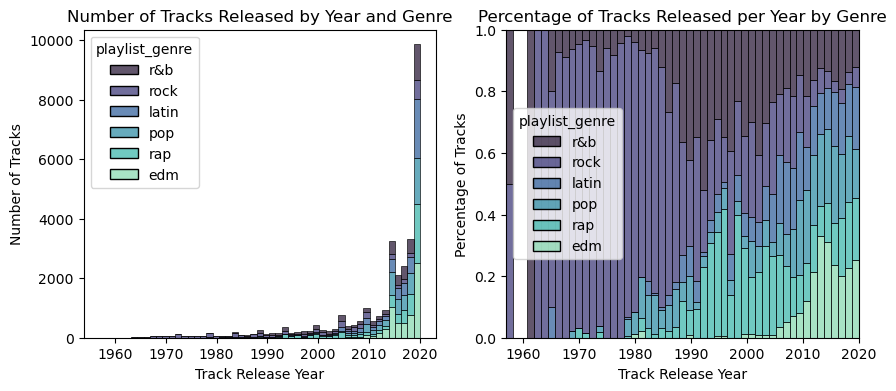

In [113]:
fig_1= plt.figure(figsize= (10,4))

ax_stacked_1=fig_1.add_subplot(1,2,1)
ax_stacked_1 = sns.histplot(
    df_plot1,
    x='year_only',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='track_name',
    multiple='stack',
    bins=51,
    hue='playlist_genre', palette='mako')
ax_stacked_1.set_xlabel('Track Release Year')
ax_stacked_1.set_ylabel('Number of Tracks')
ax_stacked_1.set_title('Number of Tracks Released by Year and Genre')

ax_stacked_2=fig_1.add_subplot(1,2,2)
ax_stacked_2 = sns.histplot(
    df_plot1,
    x='year_only',
    weights='track_name',
    multiple='fill',
    bins=51,
    hue='playlist_genre', palette='mako')
ax_stacked_2.set_xlabel('Track Release Year')
ax_stacked_2.set_ylabel('Percentage of Tracks')
ax_stacked_2.set_title('Percentage of Tracks Released per Year by Genre')






In [114]:
pivot_genre= df.pivot_table(index='playlist_genre', columns='decade',aggfunc='size', fill_value=0)
pivot_genre.columns = pivot_genre.columns.astype(int)
pivot_genre

decade,1950,1960,1970,1980,1990,2000,2010,2020
playlist_genre,,,,,,,,
edm,0,0,0,2,4,139,5640,184
latin,0,1,1,34,112,600,4082,131
pop,0,1,9,88,97,370,4568,170
r&b,1,11,34,176,657,873,3249,93
rap,0,0,5,47,514,719,4024,159
rock,1,118,597,607,495,864,1417,48


In [115]:
pivot_subgenre= df.pivot_table(index=['playlist_genre','playlist_subgenre'], columns='decade', aggfunc='size', fill_value=0)
pivot_subgenre.columns = pivot_subgenre.columns.astype(int)
pivot_subgenre


decade                                    1950  1960  1970  1980  1990  2000  \
playlist_genre playlist_subgenre                                               
edm            big room                      0     0     0     0     2     8   
               electro house                 0     0     0     0     1     9   
               pop edm                       0     0     0     0     0    15   
               progressive electro house     0     0     0     2     1   107   
latin          latin hip hop                 0     1     1    24    57   240   
               latin pop                     0     0     0    10    43   135   
               reggaeton                     0     0     0     0     0   201   
               tropical                      0     0     0     0    12    24   
pop            dance pop                     0     0     0     0    32    27   
               electropop                    0     0     2    73    47   150   
               indie poptimism               0     0     0     0     1    30   
               post-teen pop                 0     1     7    15    17   163   
r&b            hip pop                       0     0     0     1    26   126   
               neo soul                      0     3     2    24   109   359   
               new jack swing                0     0     0   133   462   282   
               urban contemporary            1     8    32    18    60   106   
rap            gangster rap                  0     0     0    14   199   251   
               hip hop                       0     0     0     0     6    83   
               southern hip hop              0     0     5    33   309   385   
               trap                          0     0     0     0     0     0   
rock           album rock                    0    28   210   202   113   194   
               classic rock                  1    60   229   150   103   207   
               hard rock                     0    15    78   111    94   243   
               permanent wave                0    15    80   144   185   220   

decade                                    2010  2020  
playlist_genre playlist_subgenre                      
edm            big room                   1151    39  
               electro house              1445    47  
               pop edm                    1427    65  
               progressive electro house  1617    33  
latin          latin hip hop              1228    21  
               latin pop                   948    54  
               reggaeton                   698    26  
               tropical                   1208    30  
pop            dance pop                  1147    59  
               electropop                 1046     7  
               indie poptimism            1517    99  
               post-teen pop               858     5  
r&b            hip pop                     997    75  
               neo soul                   1047     3  
               new jack swing              108     0  
               urban contemporary         1097    15  
rap            gangster rap                883     5  
               hip hop                    1126    98  
               southern hip hop            780     0  
               trap                       1235    56  
rock           album rock                  163     0  
               classic rock                259     3  
               hard rock                   709    32  
               permanent wave              286    13

In [116]:
df[df['playlist_subgenre']=='new jack swing'].sort_values('track_popularity', ascending=False)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year_only,decade
24934,2tUBqZG2AbRi7Q0BIrVrEj,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,80,5Vdzprr5cOqXQo44eHeV7t,Whitney,1987-06-02,80s-90s R&B / New Jack Swing / Funk / Dance / ...,3X4HmijjKdwwLonCrOOEAZ,r&b,...,1,0.0453,0.20700,0.000307,0.0888,0.867,118.814,291293,1987.0,1980.0
24362,3ibKnFDaa3GhpPGlOUj7ff,Let Me Love You,Mario,77,7EXstuWka51pNFzEAidEol,Let Me Love You,2004-09-21,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,r&b,...,0,0.0922,0.23500,0.000000,0.1180,0.556,94.514,256733,2004.0,2000.0
25085,68vgtRHr7iZHpzGpon6Jlo,My Boo,Usher,77,1RM6MGv6bcl6NrAG8PGoZk,Confessions (Expanded Edition),2004-03-23,R&B 80's/90's/00's,2Ey63yNQeC9Yto7JwX9BGJ,r&b,...,1,0.1180,0.25700,0.000000,0.0465,0.676,86.412,223440,2004.0,2000.0
24833,6MdqqkQ8sSC0WB4i8PyRuQ,No Diggity,Blackstreet,76,2zGZLQiFl9UubtrVmtIkbi,Another Level,1996-09-09,The Sound of New Jack Swing,0zn8nuASKC0PISqD9mxCSV,r&b,...,0,0.2880,0.30300,0.000000,0.2840,0.670,88.641,304600,1996.0,1990.0
25152,2aBxt229cbLDOvtL7Xbb9x,Always Be My Baby,Mariah Carey,73,1ibYM4abQtSVQFQWvDSo4J,Daydream,1995-09-26,1987-1997 OLD SKOOL JAMZ,0WicovBbxeB0nvQC6IfuaT,r&b,...,1,0.0363,0.45700,0.000000,0.2490,0.488,78.946,258133,1995.0,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24266,5IQ3uotT6Xs3AegNedhZfL,Booti Call,Blackstreet,0,3VYLCiqzrWiQPXSSddpYqk,Blackstreet,1994-01-01,90's NEW JACK SWING,0dmInkymNnOTWvEFamSNzb,r&b,...,0,0.0538,0.00819,0.000838,0.0830,0.852,99.123,266493,1994.0,1990.0
24769,1UO1yyMxEAYmYYQgIQJKMm,"Alright - 7"" House Mix With Rap",Janet Jackson,0,72AKESbPVJH2P2lq7i1owF,Number Ones,2009-01-01,New Jack Swing,4nX6BscFtR1CozSCfv2cuR,r&b,...,1,0.0357,0.00580,0.051600,0.0661,0.605,111.786,298800,2009.0,2000.0
24768,2RNIViZ0tr9yWqovJC5w7y,I Wonder if I Take You Home,Full Force,0,03HG9UVk3Jq8qNwpl4vdFE,Still Standing,2001-06-26,New Jack Swing,4nX6BscFtR1CozSCfv2cuR,r&b,...,1,0.0971,0.03530,0.088000,0.2500,0.621,115.128,238533,2001.0,2000.0
24268,231mi5BkHyJHxQre25S6oS,Poison,Bell Biv DeVoe,0,0PPAtp7bE7Itwl0UtG1mXc,20 #1's: 90's R&B,2015-06-15,90's NEW JACK SWING,0dmInkymNnOTWvEFamSNzb,r&b,...,0,0.2030,0.00188,0.001570,0.5990,0.761,111.871,262053,2015.0,2010.0


/var/folders/22/1r7qns112_schw4w5gy3c5r00000gn/T/ipykernel_16045/609665209.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2_2 = sns.lineplot(df_since70, x='year_only', y=round(df_since70['duration_ms']/60000,0), color= 'r', ci=None)
/var/folders/22/1r7qns112_schw4w5gy3c5r00000gn/T/ipykernel_16045/609665209.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax_2_2_2 = sns.lineplot(df_since70, x='year_only', y=df_since70['duration_ms']/60000, ax=ax_2_2_2, color = 'b', estimator=np.median, ci=None)


(3.0, 5.0)

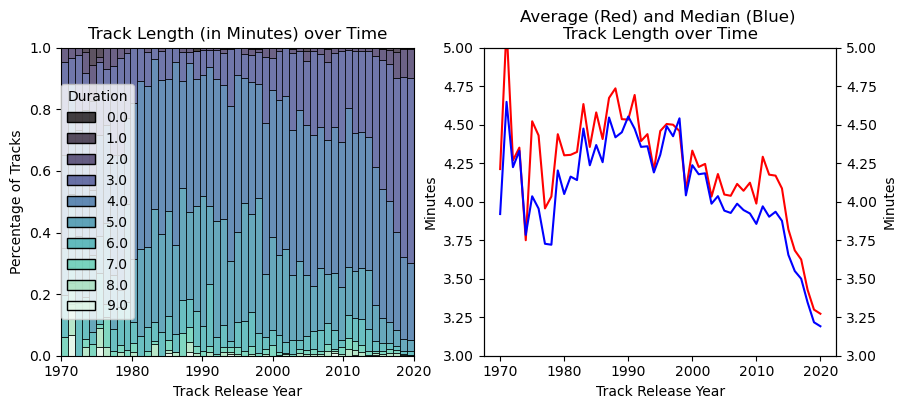

In [117]:
df_since70 = df[df['year_only']>=1970]



fig_2= plt.figure(figsize= (10,4))
ax_2_1 = fig_2.add_subplot(1,2,1)
ax_2_1=sns.histplot(df_since70, x='year_only', hue=round(df_since70['duration_ms']/60000,0), multiple='fill', bins=51, palette='mako')
sns.move_legend(ax_2_1, loc='center left', borderaxespad=0, title = 'Duration')
ax_2_1.set_title('Track Length (in Minutes) over Time')
ax_2_1.set_xlabel('Track Release Year')
ax_2_1.set_ylabel('Percentage of Tracks')

ax_2_2 = fig_2.add_subplot(1,2,2)
ax_2_2 = sns.lineplot(df_since70, x='year_only', y=round(df_since70['duration_ms']/60000,0), color= 'r', ci=None)
ax_2_2_2 = plt.twinx()
ax_2_2_2 = sns.lineplot(df_since70, x='year_only', y=df_since70['duration_ms']/60000, ax=ax_2_2_2, color = 'b', estimator=np.median, ci=None)
ax_2_2.set_title('Average (Red) and Median (Blue) \nTrack Length over Time')
ax_2_2.set_xlabel('Track Release Year')
ax_2_2.set_ylabel('Minutes')
ax_2_2_2.set_ylabel('Minutes')
ax_2_2_2.set_ylim(3,5)
ax_2_2.set_ylim(3,5)



Text(0.5, 0, 'Track Album Release Year')

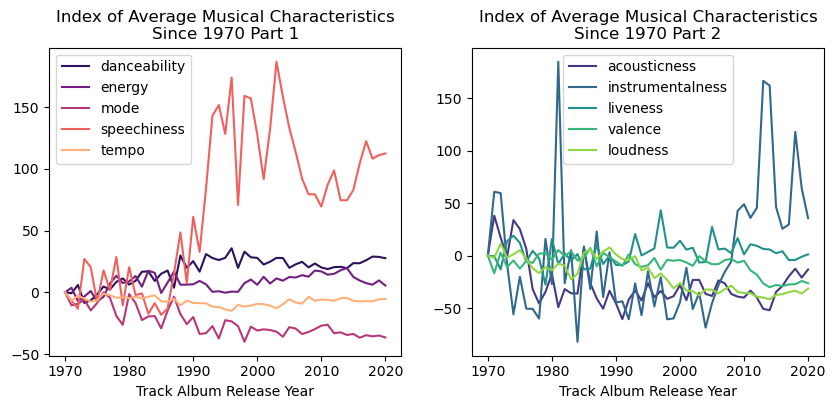

In [118]:
group_cols = ['year_only','danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']
group_cols_1=['danceability', 'energy', 'mode', 'speechiness', 'tempo']
group_cols_2= ['acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness']
df_plot4 = df_since70.groupby('year_only')[group_cols].mean()
index_vals = df_plot4.iloc[0]
percent_change = ((df_plot4 - index_vals)/index_vals)*100

fig_4= plt.figure(figsize= (10,4))


ax_4_1 = fig_4.add_subplot(1,2,1)
ax_4_1 = sns.lineplot(data=percent_change[group_cols_1], dashes=False, palette='magma')
ax_4_1.set_title('Index of Average Musical Characteristics\nSince 1970 Part 1')
ax_4_1.set_xlabel('Track Album Release Year')

ax_4_2 = fig_4.add_subplot(1,2,2)
ax_4_2 = sns.lineplot(data=percent_change[group_cols_2], dashes=False, palette = 'viridis')
ax_4_2.set_title('Index of Average Musical Characteristics\nSince 1970 Part 2')
ax_4_2.set_xlabel('Track Album Release Year')


# df_since70.groupby('year_only')[group_cols].mean().plot()

## Genre Analysis

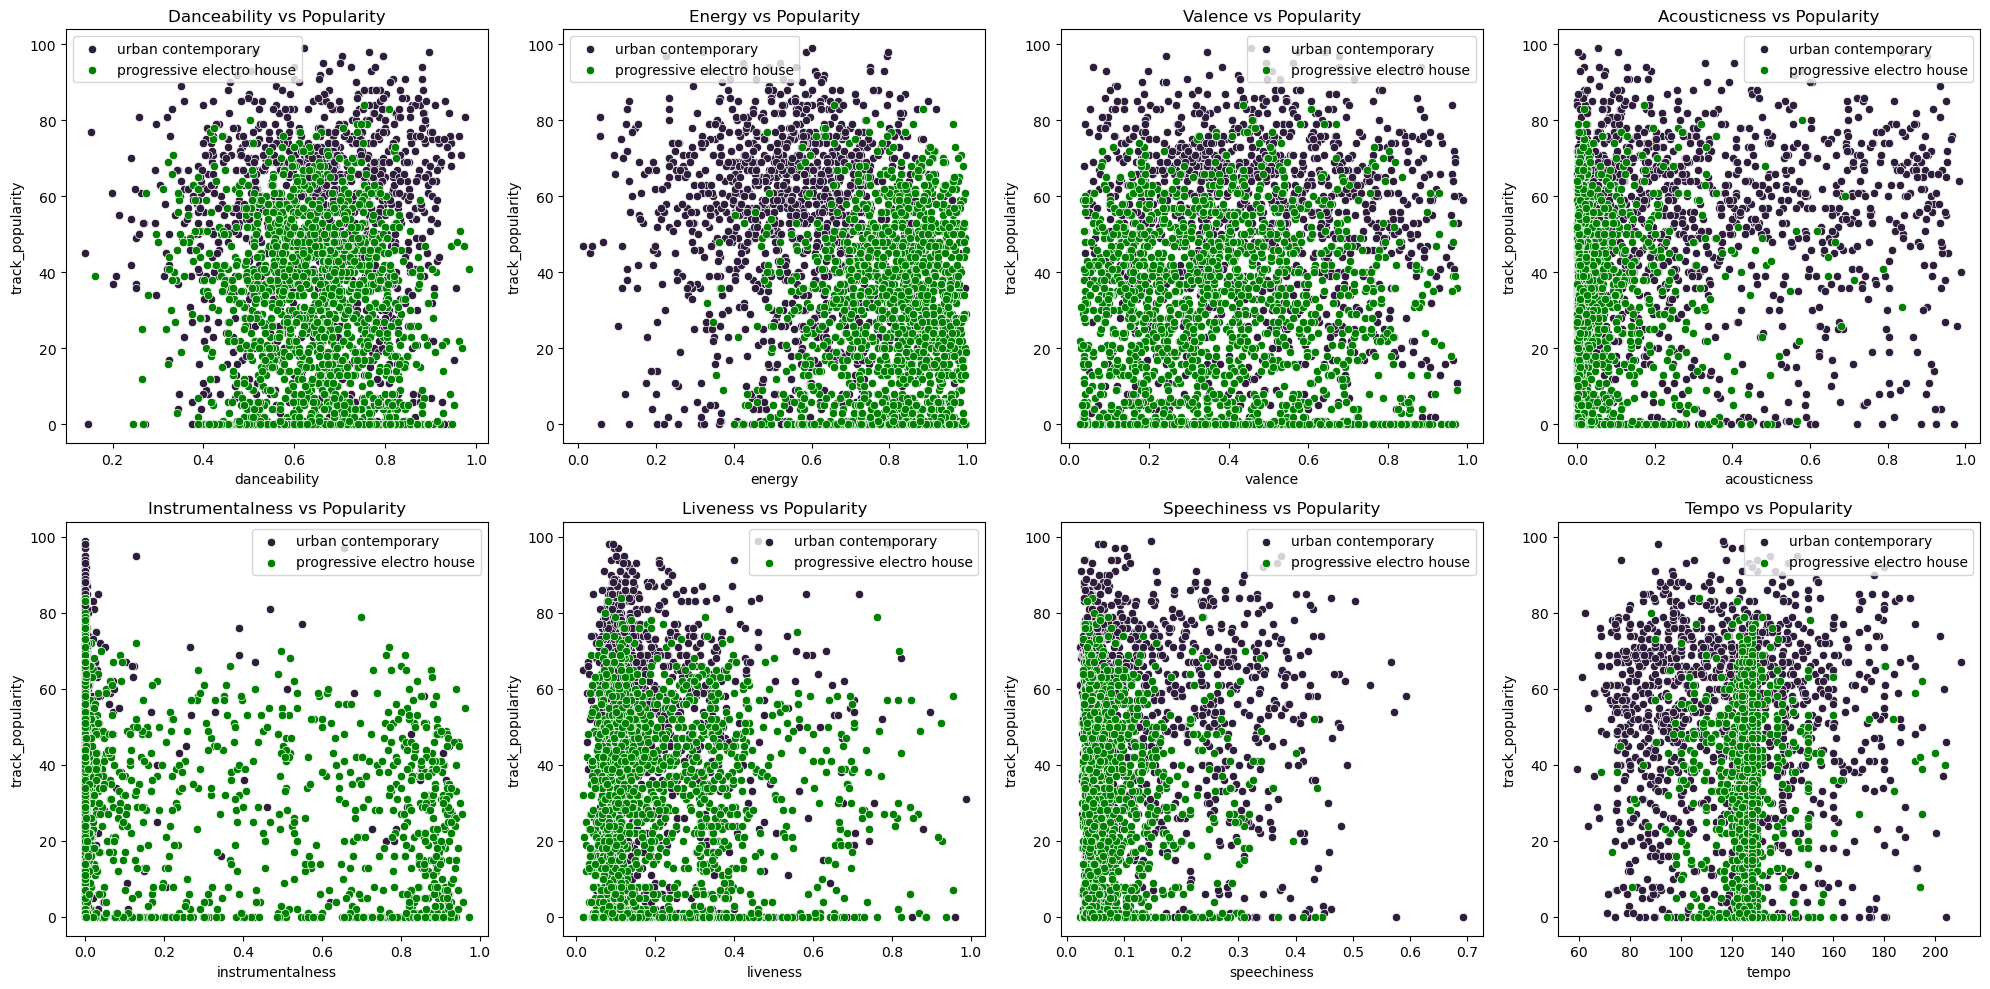

In [147]:
# Genres
mako_palette = sns.color_palette("viridis", as_cmap=True)
post_teen_pop = df[df['playlist_subgenre'] == 'urban contemporary']
progressive_electro_house = df[df['playlist_subgenre'] == 'progressive electro house']

# Selecting attributes for the scatter plot
attributes = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']

# Creating scatter plots
plt.figure(figsize=(20, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=attribute, y='track_popularity', data=post_teen_pop, label='urban contemporary')
    sns.scatterplot(x=attribute, y='track_popularity', data=progressive_electro_house, label='progressive electro house', color = 'g')
    plt.title(f'{attribute.capitalize()} vs Popularity')
    plt.legend()

plt.tight_layout()
plt.show()

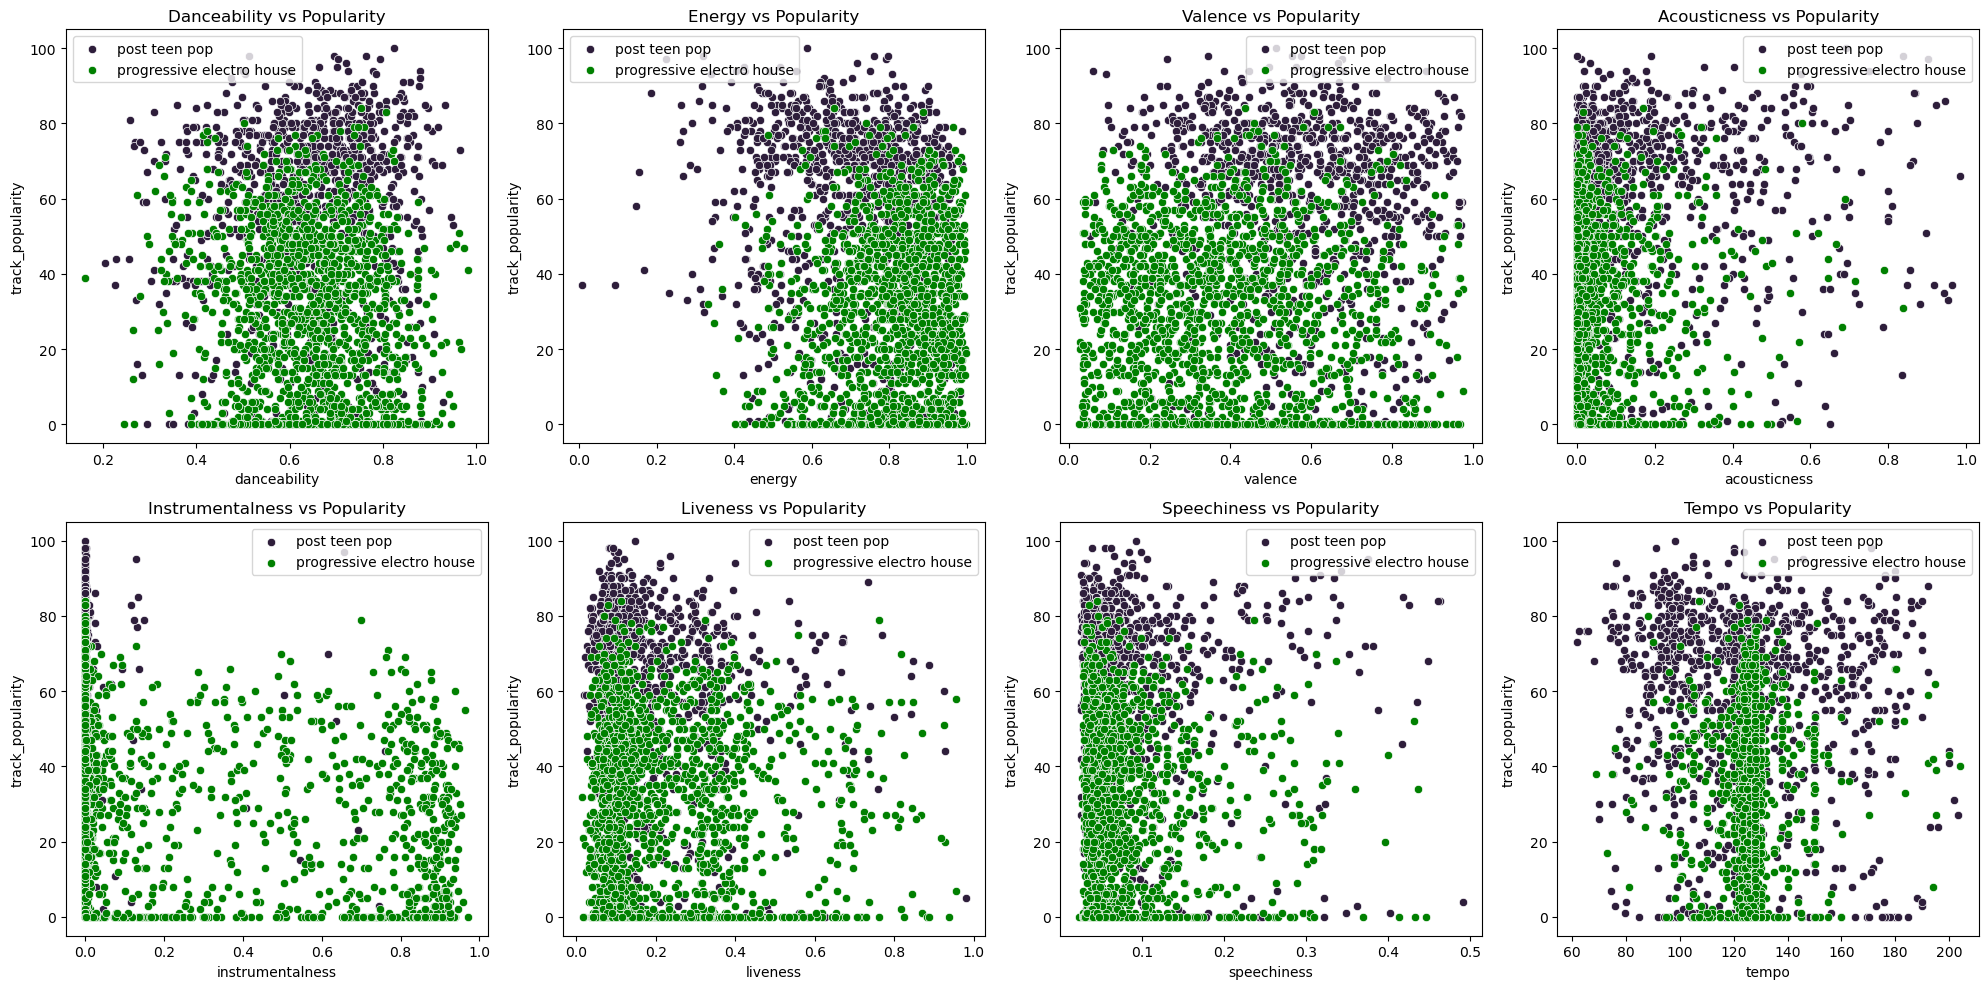

In [148]:
post_teen_pop = df[df['playlist_subgenre'] == 'post-teen pop']
progressive_electro_house = df[df['playlist_subgenre'] == 'progressive electro house']

# Selecting attributes for the scatter plot
attributes = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']

# Creating scatter plots
plt.figure(figsize=(20, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=attribute, y='track_popularity', data=post_teen_pop, label='post teen pop', )
    sns.scatterplot(x=attribute, y='track_popularity', data=progressive_electro_house, label='progressive electro house', color = 'g')
    plt.title(f'{attribute.capitalize()} vs Popularity')
    plt.legend()

plt.tight_layout()
plt.show()

# Popularity

### Top 5 Songs Per Decade Based Solely on Popularity 



In [120]:
# Sort the DataFrame by 'track_popularity' within each decade
df_sorted = df.groupby('decade').apply(lambda x: x.sort_values(by='track_popularity', ascending=False)).reset_index(drop=True)

# Remove duplicate tracks within each decade
df_no_duplicates = df_sorted.drop_duplicates(subset=['decade', 'track_name'])

# Get the top 5 songs per decade
top_5_songs_per_decade = df_no_duplicates.groupby('decade').head(5).reset_index(drop=True)

# Sort by decade and then by track popularity
top_5_sorted = top_5_songs_per_decade.sort_values(by=['decade', 'track_popularity'], ascending=[True, True])

# Selecting relevant columns for display
columns_for_display = ['decade', 'track_name', 'track_artist', 'track_album_name', 'track_popularity']
top_5_display = top_5_sorted[columns_for_display]


In [121]:
from tabulate import tabulate

# Print title
print("Top 5 Songs Per Decade (Ordered by Popularity)")

# Print the table using tabulate
print(tabulate(top_5_display, headers='keys', tablefmt='pretty'))


Top 5 Songs Per Decade (Ordered by Popularity)
+----+--------+---------------------------------------------------------+------------------------------+----------------------------------------------+------------------+
|    | decade |                       track_name                        |         track_artist         |               track_album_name               | track_popularity |
+----+--------+---------------------------------------------------------+------------------------------+----------------------------------------------+------------------+
| 1  | 1950.0 |                       Mess Around                       |         Ray Charles          | Ray Charles (aka: Hallelujah, I Love Her So) |        59        |
| 0  | 1950.0 |                     Jailhouse Rock                      |        Elvis Presley         |            Elvis' Golden Records             |        73        |
| 4  | 1960.0 |            Whole Lotta Love - 1990 Remaster             |         Led Zeppelin    

In [122]:
import seaborn as sns

# Define the colors from the "seaborn mako" palette
mako_palette = sns.color_palette("mako", as_cmap=True)

# Styling the DataFrame
styled_table = top_5_display.style.background_gradient(cmap=mako_palette, subset=['track_popularity'])\
                            .set_properties(**{'text-align': 'left'})\
                            .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
                            .set_caption("Top 5 Songs Per Decade (Ordered by Popularity)")

# Display the styled table
styled_table


,decade,track_name,track_artist,track_album_name,track_popularity
1,1950.000000,Mess Around,Ray Charles,"Ray Charles (aka: Hallelujah, I Love Her So)",59
0,1950.000000,Jailhouse Rock,Elvis Presley,Elvis' Golden Records,73
4,1960.000000,Whole Lotta Love - 1990 Remaster,Led Zeppelin,Led Zeppelin II,76
5,1960.000000,All Along the Watchtower,Jimi Hendrix,Electric Ladyland,76
6,1960.000000,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,Out Of Our Heads,76
3,1960.000000,Come Together - Remastered 2009,The Beatles,Abbey Road (Remastered),79
2,1960.000000,Fortunate Son,Creedence Clearwater Revival,Willy And The Poor Boys,80
11,1970.000000,"Rocket Man (I Think It's Going To Be A Long, Long Time)",Elton John,Honky Chateau,81
10,1970.000000,Hotel California - 2013 Remaster,Eagles,Hotel California (2013 Remaster),82
8,1970.000000,Highway to Hell,AC/DC,Highway to Hell,83


### Determine and see how other variables correlate with track popularity

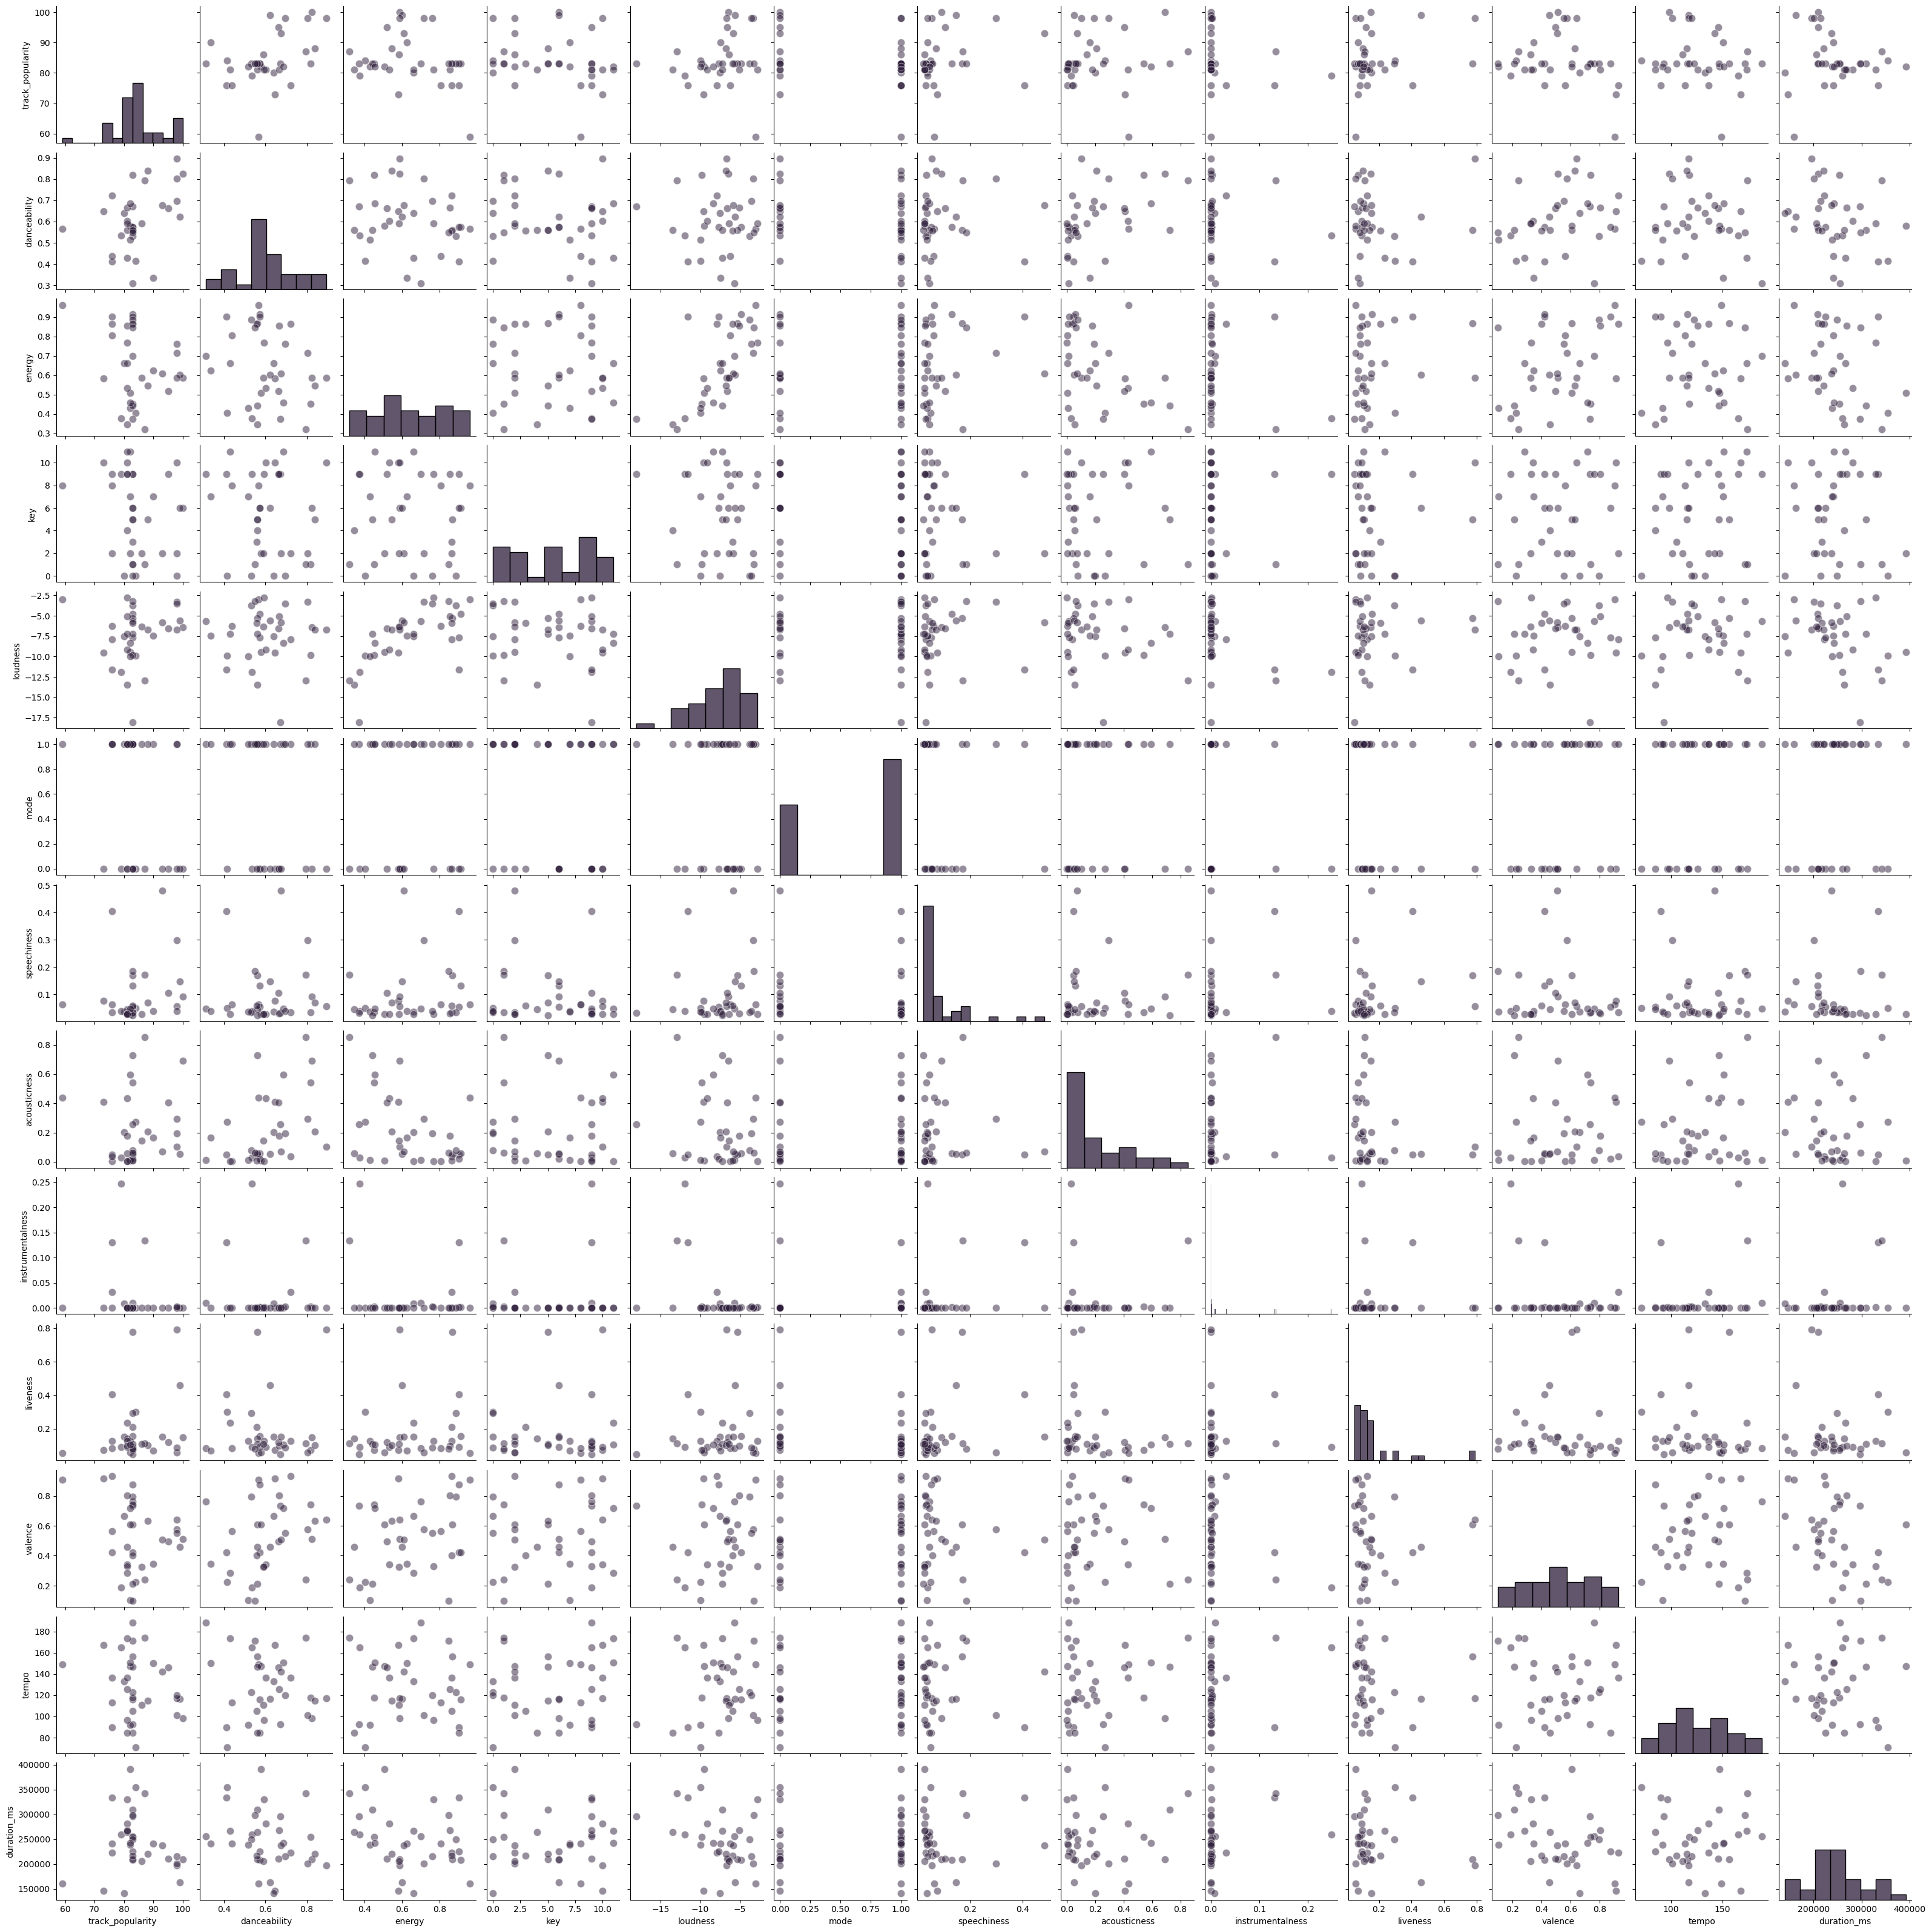

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for the plot
columns_to_plot = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df_top_songs = top_5_songs_per_decade[columns_to_plot]

custom_palette = ["#FF6B6B", "#FFE66D", "#B6E8B7", "#76D7EA", "#C5A1B5"]


# Create a pairplot
sns.pairplot(df_top_songs, kind='scatter', diag_kind='hist', plot_kws={'alpha':0.5, 's':80, "palette": custom_palette})

plt.show()
 

## Regression 

#### This determines how multiple variables together influence song popularity


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting variables for regression
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['track_popularity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False)}")


RMSE: 24.17129408711124


In [125]:
# Extracting coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Displaying coefficients
print(coefficients)


                  Coefficient
danceability         6.406607
energy             -30.388862
key                  0.045487
loudness             1.591445
mode                 0.754518
speechiness         -7.448817
acousticness         3.871307
instrumentalness   -12.659845
liveness            -3.645702
valence              2.826608
tempo                0.024533
duration_ms         -0.000047


In [126]:
# P values
import statsmodels.api as sm

# Selecting variables for regression
X = df[[]]
y = df['track_popularity']
'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
# Adding a constant to the model (statsmodels doesn't add a constant by default)
X = sm.add_constant(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Printing the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                nan
Time:                        15:54:35   Log-Likelihood:            -1.0038e+05
No. Observations:               21659   AIC:                         2.008e+05
Df Residuals:                   21658   BIC:                         2.008e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8301      0.169    252.975      0.0

Note: Each coefficient represents the change in track popularity for a one unit change in the corresponding featurem assuming all other features are held constant:

**Positive Coefficient:** If a feature has a positive coefficient, it means that as the value of that feature increases, the predicted value of track_popularity also increases, all else being equal.

**Negative Coefficient:** Conversely, a negative coefficient indicates that as the value of the feature increases, the predicted value of track_popularity decreases.

**Magnitude of Coefficients:** The larger the absolute value of the coefficient, the more significant the impact of that feature on track_popularity.

**Scale of Features:** Remember that the impact of the coefficients is directly related to the scale of your features. Features with larger numeric ranges might seem to have smaller coefficients.


#### Interpretation

Danceability (Coefficient: 4.9237, P-value: <0.001): Significant. Indicates that an increase in danceability tends to increase track popularity.

Energy (Coefficient: -30.6083, P-value: <0.001): Significant. Suggests that an increase in energy tends to decrease track popularity.

Loudness (Coefficient: 1.5470, P-value: <0.001): Significant. Implies that louder tracks are likely to be more popular.

Mode (Coefficient: 0.8476, P-value: 0.009): Moderately significant. Indicates a slight effect of the mode on track popularity.

Speechiness (Coefficient: -7.9252, P-value: <0.001): Significant. Tracks with more speech (like rap) tend to be less popular.

Acousticness (Coefficient: 3.2708, P-value: <0.001): Significant. More acoustic tracks tend to be more popular.

Instrumentalness (Coefficient: -11.7625, P-value: <0.001): Significant. Tracks with more instrumental content are less likely to be popular.

Liveness (Coefficient: -4.4848, P-value: <0.001): Significant. Live-sounding tracks are less likely to be popular.

Valence (Coefficient: 2.5261, P-value: 0.001): Significant. Tracks with higher valence (happiness) tend to be more popular.

Tempo (Coefficient: 0.0215, P-value: <0.001): Significant. Suggests a very slight increase in popularity with faster tempo.

Duration (Coefficient: -0.000046, P-value: <0.001): Significant. Longer tracks tend to be slightly less popular.

Key (Coefficient: 0.0156, P-value: 0.726): Not significant. The key of the song does not appear to have a significant impact on its popularity.

## Average Popularity by Sub-Genre

Text(0.5, 1.0, 'Average Popularity by Sub-Genre')

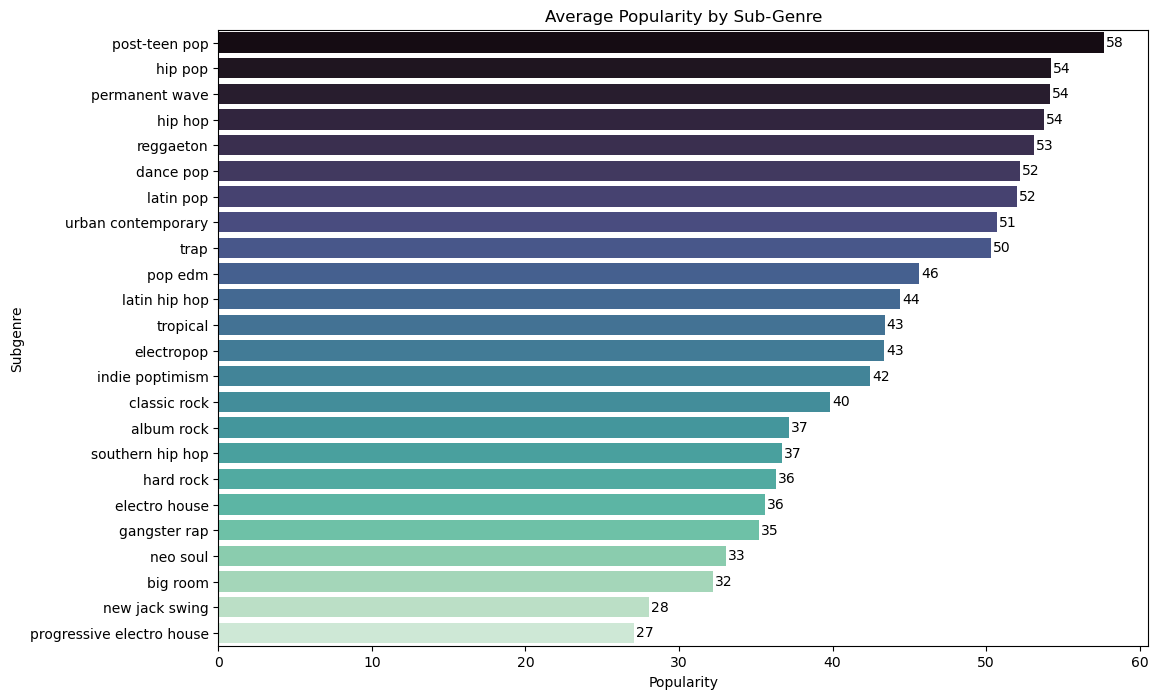

In [127]:
# Calculate average popularity and count for each subgenre
average_popularity = df.groupby('playlist_subgenre')['track_popularity'].mean().reset_index()
count_by_subgenre = df['playlist_subgenre'].value_counts().reset_index()
count_by_subgenre.columns = ['playlist_subgenre', 'count']

# Merge the average popularity with counts
merged_data = pd.merge(average_popularity, count_by_subgenre, on='playlist_subgenre')

# Sorting the data by average popularity
merged_data = merged_data.sort_values('track_popularity', ascending=False)

# Creating a bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='track_popularity', y='playlist_subgenre', data=merged_data, palette='mako')

# Annotate each bar with the count
for p in barplot.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 0.7,    # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2,  # get Y coordinate + half of the bar's height
             '{:1.0f}'.format(width),  # set the count (formatted to remove decimal places)
             ha = 'center',   # horizontal alignment
             va = 'center')   # vertical alignment

plt.xlabel('Popularity')
plt.ylabel('Subgenre')
plt.title("Average Popularity by Sub-Genre")

## Characteristics of Various songs

I am trying this in 2 ways. 1. Splitting low vs high popularity songs and comparing charaxteristics vs correlation

### High VS Low

In [128]:
# Define a threshold for high popularity - this could be a specific value or a percentile
popularity_threshold = df['track_popularity'].quantile(0.75)

# Create two new DataFrames - one for high popularity and one for low
high_popularity_df = df[df['track_popularity'] >= popularity_threshold]
low_popularity_df = df[df['track_popularity'] < popularity_threshold]

In [129]:
# List of characteristics
characteristics = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Calculate the mean values for high and low popularity songs
avg_high_pop = high_popularity_df[characteristics].mean()
avg_low_pop = low_popularity_df[characteristics].mean()

# Create a list of characteristic labels
labels = characteristics



In [130]:
# checking values because the graph was funky, learned duration is skewing it 

print(f"Values for songs with low popularity: {avg_low_pop}")

print(f"Values for songs with high popularity: {avg_high_pop}")

print(f"Number of high popularity songs: {high_popularity_df.shape[0]}")
print(f"Number of low popularity songs: {low_popularity_df.shape[0]}")


Values for songs with low popularity: danceability             0.651853
energy                   0.706125
loudness                -6.793464
mode                     0.555507
speechiness              0.108247
acousticness             0.170666
instrumentalness         0.108915
liveness                 0.194068
valence                  0.496939
tempo                  120.982756
duration_ms         225996.597301
dtype: float64
Values for songs with high popularity: danceability             0.672652
energy                   0.678170
loudness                -6.200664
mode                     0.576455
speechiness              0.108179
acousticness             0.191043
instrumentalness         0.024448
liveness                 0.178333
valence                  0.528041
tempo                  120.827150
duration_ms         218111.248135
dtype: float64
Number of high popularity songs: 8044
Number of low popularity songs: 22898


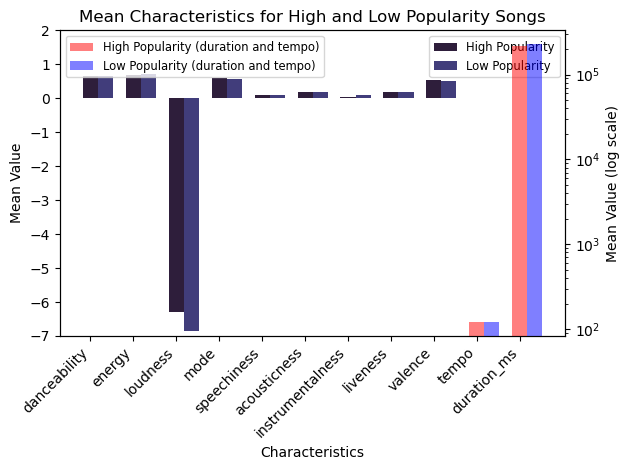

In [131]:
# love when the data is weird so you have to do it manually 



# Set the Seaborn style to use the Mako palette
sns.set_palette("mako")

# Characteristics and their mean values for high and low popularity songs
characteristics = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
avg_high_pop = [0.668544, 0.678465, -6.291661, 0.582012, 0.106199, 0.190809, 0.024912, 0.179313, 0.531048, 120.843617, 219290.296923]
avg_low_pop = [0.650104, 0.705583, -6.867838, 0.560095, 0.107350, 0.169994, 0.105504, 0.193940, 0.503453, 120.897515, 228052.150258]

# Number of characteristics
num_characteristics = len(characteristics)

# Create an array of indices for the characteristics
indices = np.arange(num_characteristics)

# Width of each bar
bar_width = 0.35

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Create bars for high and low popularity means (excluding "tempo" and "duration_ms")
high_pop_bars = ax1.bar(indices[:-2], avg_high_pop[:-2], bar_width, label='High Popularity')
low_pop_bars = ax1.bar(indices[:-2] + bar_width, avg_low_pop[:-2], bar_width, label='Low Popularity')

# Set the primary y-axis range from 2 to -7
ax1.set_ylim(-7, 2)

# Set the y-axis label for the primary y-axis
ax1.set_ylabel('Mean Value')

# Set the plot title
ax1.set_title('Mean Characteristics for High and Low Popularity Songs')

# Create a second y-axis for "tempo" and "duration_ms" on a log scale
ax2 = ax1.twinx()

# Create bars for "tempo" and "duration_ms" on a log scale
high_pop_bars_duration = ax2.bar(indices[-2:], avg_high_pop[-2:], bar_width, label='High Popularity (duration and tempo)', alpha=0.5, color='red')
low_pop_bars_duration = ax2.bar(indices[-2:] + bar_width, avg_low_pop[-2:], bar_width, label='Low Popularity (duration and tempo)', alpha=0.5, color='blue')

# Set the secondary y-axis to be on a log scale for "tempo" and "duration_ms"
ax2.set_yscale('log')

# Set the y-axis label for the secondary y-axis
ax2.set_ylabel('Mean Value (log scale)')

# Move the legends to the right of the graph
ax1.legend(loc='best', fontsize = "small")
ax2.legend(loc='best', fontsize = "small")


# Set the characteristics as x-axis labels
ax1.set_xlabel('Characteristics')
ax1.set_xticks(indices)
ax1.set_xticklabels(characteristics, rotation=45, ha='right')

# Display the combined graph
plt.tight_layout()
plt.show()

In [132]:
# Create a DataFrame
data = {
    'Characteristics': characteristics,
    'Average High Popularity': avg_high_pop,
    'Average Low Popularity': avg_low_pop
}

mean_characteristics = pd.DataFrame(data)

# Display the DataFrame as a table
print(mean_characteristics)

     Characteristics  Average High Popularity  Average Low Popularity
0       danceability                 0.668544                0.650104
1             energy                 0.678465                0.705583
2           loudness                -6.291661               -6.867838
3               mode                 0.582012                0.560095
4        speechiness                 0.106199                0.107350
5       acousticness                 0.190809                0.169994
6   instrumentalness                 0.024912                0.105504
7           liveness                 0.179313                0.193940
8            valence                 0.531048                0.503453
9              tempo               120.843617              120.897515
10       duration_ms            219290.296923           228052.150258


Danceability: High popularity songs have a slightly higher average danceability (0.668544) compared to low popularity songs (0.650104), suggesting that songs with higher danceability tend to be more popular.

Energy: High popularity songs have a slightly lower average energy (0.678465) compared to low popularity songs (0.705583), indicating that energy alone may not be a strong predictor of popularity.

Loudness: High popularity songs have a higher average loudness (-6.291661) compared to low popularity songs (-6.867838). This suggests that louder songs tend to be more popular.

Mode: The mode, which represents modality (major or minor), shows that high popularity songs (0.582012) are more often in major mode compared to low popularity songs (0.560095).

Speechiness: There is a minimal difference in speechiness between high popularity (0.106199) and low popularity (0.107350) songs, implying that speechiness doesn't strongly differentiate the two groups.

Acousticness: High popularity songs have slightly higher average acousticness (0.190809) compared to low popularity songs (0.169994), indicating that more acoustic songs can be found among popular songs.

Instrumentalness: High popularity songs have significantly lower instrumentalness (0.024912) compared to low popularity songs (0.105504), suggesting that popular songs tend to have vocals.

Liveness: There is a minimal difference in liveness between high popularity (0.179313) and low popularity (0.193940) songs, indicating that liveness doesn't strongly differentiate the two groups.

Valence: High popularity songs have a slightly higher average valence (0.531048) compared to low popularity songs (0.503453), suggesting that popular songs may have a more positive mood.

Tempo: The tempo is quite similar between high popularity (120.843617) and low popularity (120.897515) songs, indicating that tempo alone doesn't strongly differentiate the two groups.

Duration: High popularity songs have a shorter average duration (219,290.30 ms) compared to low popularity songs (228,052.15 ms), suggesting that shorter songs may be more popular

### 2. correlation

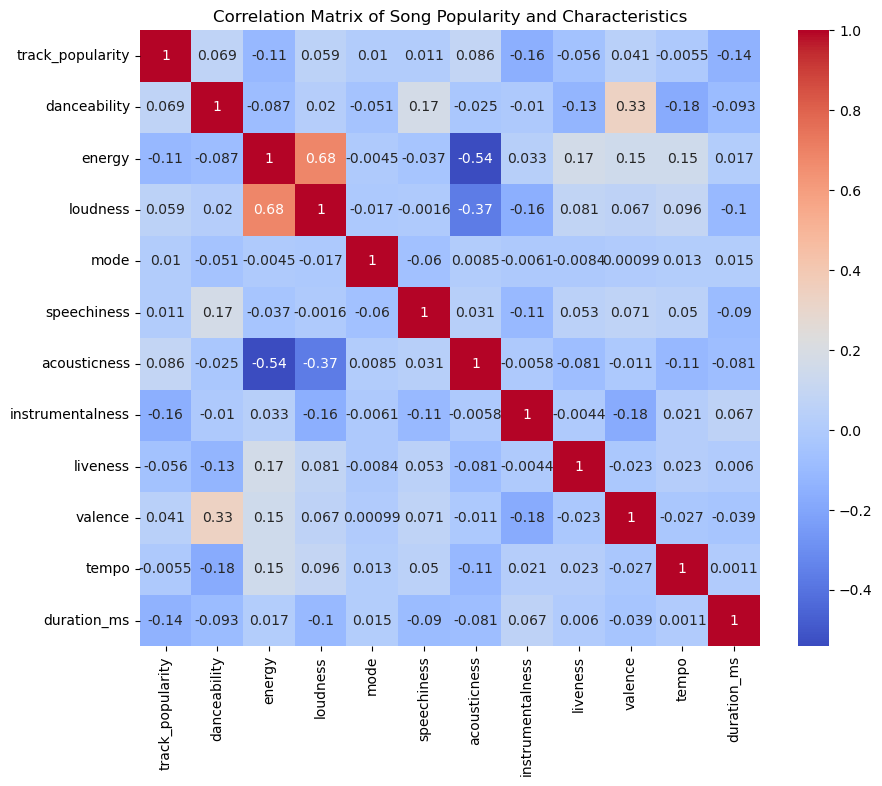

In [133]:
# Selecting relevant columns
columns_for_correlation = ['track_popularity'] + characteristics
correlation_data = df[columns_for_correlation]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Song Popularity and Characteristics')
plt.show()

In [134]:
# Print the correlation matrix as a table
print(correlation_matrix)

                  track_popularity  danceability    energy  loudness  \
track_popularity          1.000000      0.068846 -0.111947  0.058671   
danceability              0.068846      1.000000 -0.086517  0.019947   
energy                   -0.111947     -0.086517  1.000000  0.682929   
loudness                  0.058671      0.019947  0.682929  1.000000   
mode                      0.010157     -0.050891 -0.004534 -0.016892   
speechiness               0.011305      0.173561 -0.036593 -0.001645   
acousticness              0.086282     -0.024705 -0.540952 -0.370313   
instrumentalness         -0.157609     -0.010277  0.033355 -0.156307   
liveness                 -0.055863     -0.126053  0.165137  0.081187   
valence                   0.041173      0.333786  0.148177  0.066670   
tempo                    -0.005512     -0.177476  0.148106  0.095640   
duration_ms              -0.141681     -0.093444  0.016740 -0.103518   

                      mode  speechiness  acousticness  instrume

the correlations between these audio characteristics and song popularity are generally weak, indicating that none of these characteristics alone are strong determinants of a song's popularity. Popularity likely depends on a combination of factors

## better model to determine what combo of variables leads to track popularity.

regression models are valuable for understanding individual feature contributions, they might not directly identify the best combination of features. had high errpr 

Mean Squared Error: 573.8863404449644

Root Mean Squared Error: 23.95592495490342

R-squared (R2) Score: 0.065169676325187

####  Regression fail

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define predictor variables (audio characteristics) and the target variable
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = df[characteristics]
y = df['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

# Feature Importance Analysis (Random Forest Regressor)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_


Mean Squared Error: 583.1664302840708
Root Mean Squared Error: 24.14883910841411
R-squared (R2) Score: 0.07081664472876104


In [136]:
print(feature_importances)

[0.09051654 0.09455782 0.04382266 0.10463035 0.00990183 0.09230142
 0.09101643 0.09204708 0.08540293 0.08849961 0.09973769 0.10756565]


### feature selection to get features then lets get model

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Making duplicate df
data = df

# Define predictor variables (audio characteristics) and the target variable
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = data[characteristics]
y = data['track_popularity']


# Use SelectKBest with f_regression to select the top features
# You can adjust k to select the desired number of top features
k = 5  # Adjust this value as needed
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = [characteristics[i] for i in selected_indices]

# Sort the selected features by their scores in numerical order
sorted_features = [feature for _, feature in sorted(zip(selector.scores_, selected_features), reverse=True)]
sorted_scores = sorted(selector.scores_, reverse=True)

print("Selected Features (Numerical Order):")
for feature, score in zip(sorted_features, sorted_scores):
    print(f"Feature: {feature}, Score: {score:.2f}")

Selected Features (Numerical Order):
Feature: duration_ms, Score: 788.15
Feature: instrumentalness, Score: 633.79
Feature: acousticness, Score: 392.67
Feature: danceability, Score: 232.07
Feature: energy, Score: 147.35


## create training and test models

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target variable
X = data[selected_features]
y = data['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict track popularity on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Interpret feature coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
for feature, coef in zip(selected_features, coefficients):
    print(f"{feature}: {coef:.2f}")


Mean Squared Error (MSE): 596.46
Root Mean Squared Error (RMSE): 24.42
R-squared (R2) Score: 0.05
Intercept: 57.365515201045284
instrumentalness: -15.99
duration_ms: -0.00
energy: -11.37
acousticness: 3.75
danceability: 9.32


the linear regression model does not provide a good fit to the data, as indicated by the low R2 score

### random tree

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data[selected_features]
y = data['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict track popularity on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Interpret feature importances
feature_importances = model.feature_importances_

print("Feature Importances:")
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance:.2f}")



Mean Squared Error (MSE): 471.37
Root Mean Squared Error (RMSE): 21.71
R-squared (R2) Score: 0.25
Feature Importances:
instrumentalness: 0.16
duration_ms: 0.23
energy: 0.20
acousticness: 0.21
danceability: 0.20


Meanean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted track popularity values. In this case, the MSE of 462.95 indicates that, on average, the predictions are off by approximately 463 popularity units squared.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a more interpretable measure of the error. An RMSE of 21.52 suggests that, on average, the predictions are off by approximately 21.52 popularity units.

R-squared (R2) Score: The R2 score measures the proportion of the variance in the target variable (track popularity) that is explained by the model. An R2 score of 0.25 means that approximately 25% of the variability in track popularity is explained by the features included in the model. While this is an improvement over the linear regression model, there is still room for improvement.

Feature Importances: The feature importances show the relative importance of each selected feature in making predictions. In this case, the top features are:

- duration_ms (23% importance)
- acousticness (21% importance)
- danceability (20% importance)
- energy (20% importance)
- instrumentalness (15% importance)

These percentages indicate how much each feature contributes to the model's predictions. Features with higher importances have a stronger impact on predicting track popularity.


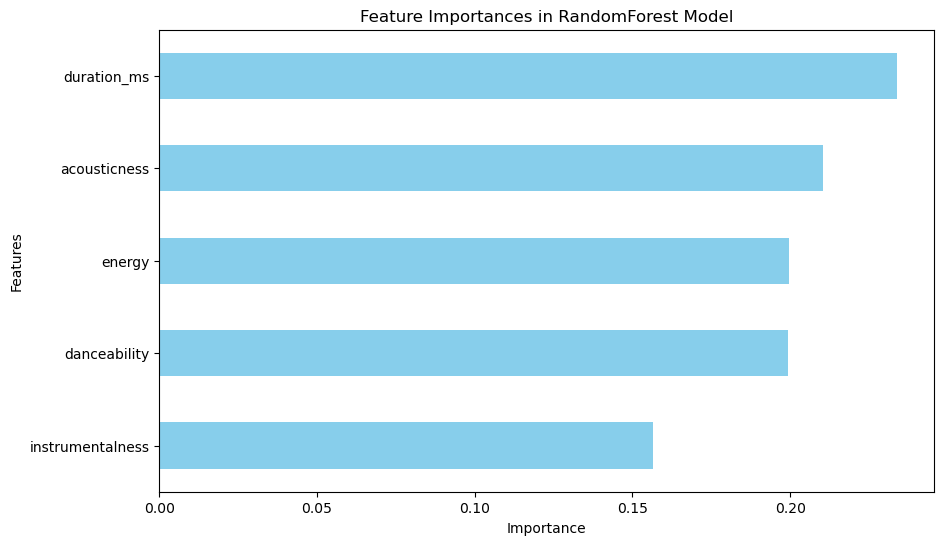

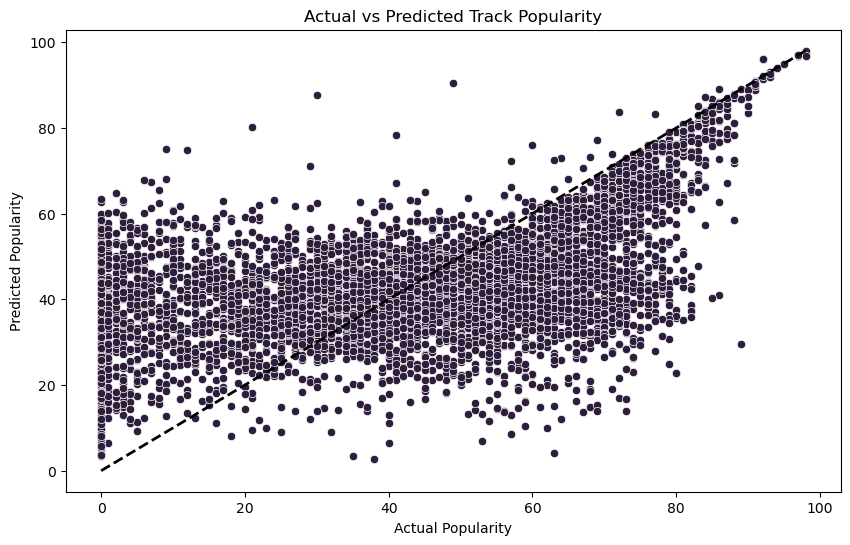

In [140]:
# Visualization of Feature Importances
feature_importances = model.feature_importances_
features = selected_features
importances = pd.Series(feature_importances, index=features)

plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualization of Actual vs Predicted Values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Track Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Positive Relationship: There's a clear positive correlation between the actual and predicted values, meaning that as the actual popularity increases, the predicted popularity also tends to increase. This is a good sign and indicates that the model has learned the trend in the data.

Concentration of Points: Most of the data points seem to be concentrated along the line (the dashed line that represents perfect predictions), especially where the actual popularity is below 60. This suggests that the model is relatively accurate within this range.

Spread of Points: As the popularity increases, the spread of predictions becomes wider, particularly for tracks with higher popularity scores (above 60). This might indicate that the model is less precise for tracks with very high popularity.

Outliers: There are some points that are far from the line, which could be considered outliers. For example, there are tracks with low actual popularity that the model predicted to have higher popularity, and vice versa.

Perfect Prediction Line: The dashed line represents the line of perfect prediction. If every prediction was correct, all points would lie on this line. While many predictions are close to this line, none are consistently on it, which is to be expected in real-world data.

Overall, the model seems to have predictive power, as indicated by the clustering of points along the line of perfect prediction, but it also has room for improvement, especially in the higher range of track popularity. 